In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from test_ts_015 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

(0.1625, 2.3075, 0.40650000000000003, 3.3435)

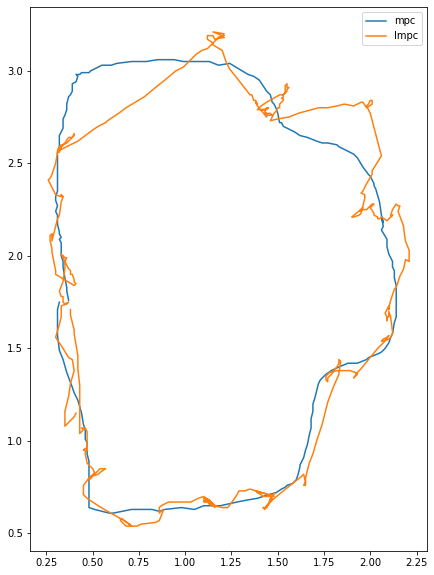

In [3]:
plt.plot(*path[:-length, :2].T, label="mpc")
plt.plot(*path[-length:, :2].T, label="lmpc")
plt.legend()

plt.gcf().set_size_inches(10, 10)
plt.axis('scaled')

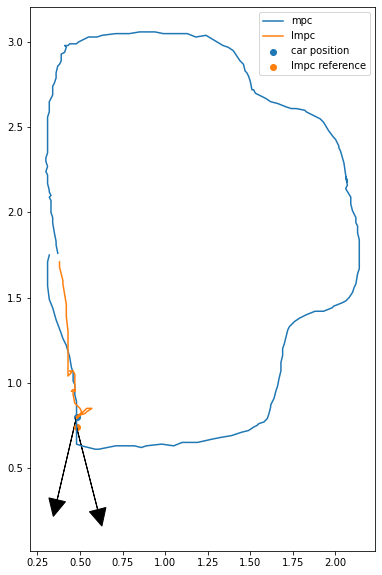

In [4]:
from test_ts_015 import path, reference, chosen_ref

path = np.array(path)
reference = np.array(reference)
chosen_ref = np.array(chosen_ref)
length = reference.shape[0]

distance = 55

fig, ax = plt.subplots()

ax.plot(*path[:-length, :2].T, label="mpc")
ax.plot(*path[-length:-length+distance, :2].T, label="lmpc")
x, y, theta = path[-length+distance, :3].T
ax.scatter(x, y, label="car position")
dx = np.cos(theta)*0.5
dy = np.sin(theta)*0.5
ax.arrow(x, y, dx, dy, head_width=0.1, head_length=0.1, fc='k', ec='k')
# plt.scatter(*reference[50, :2, :], label="lmpc references")
points = chosen_ref[distance, :3].T
ax.scatter(points[:,0], points[:,1], label="lmpc reference")

# Add arrows for orientation
for x, y, theta in points:
    dx = np.cos(theta)*0.5
    dy = np.sin(theta)*0.5
    ax.arrow(x, y, dx, dy, head_width=0.1, head_length=0.1, fc='k', ec='k')

# Show plot
ax.legend()
ax.axis('scaled')
fig.set_size_inches(10, 10)
plt.show()

(0.19849999999999995, 2.2115, 0.4444999999999999, 3.2055000000000002)

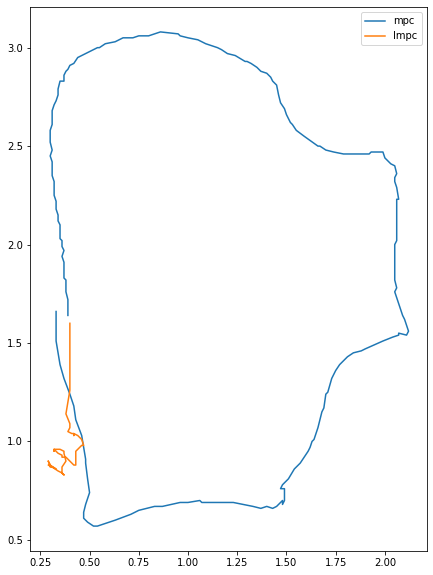

In [5]:
from N10_Ts05 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

plt.plot(*path[:-length, :2].T, label="mpc")
plt.plot(*path[-length:, :2].T, label="lmpc")
plt.legend()

plt.gcf().set_size_inches(10, 10)
plt.axis('scaled')

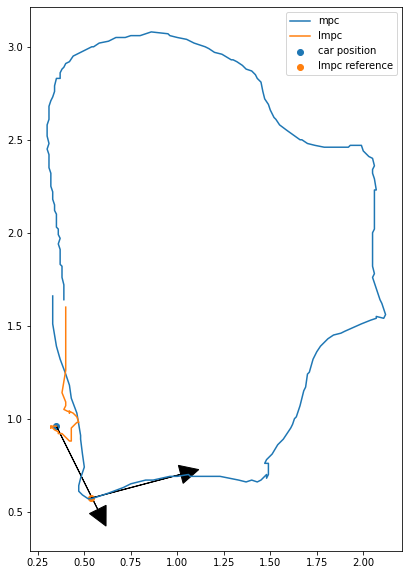

In [6]:
from N10_Ts05 import path, reference, chosen_ref

path = np.array(path)
reference = np.array(reference)
chosen_ref = np.array(chosen_ref)
length = reference.shape[0]

distance = 55

fig, ax = plt.subplots()

ax.plot(*path[:-length, :2].T, label="mpc")
ax.plot(*path[-length:-length+distance, :2].T, label="lmpc")
x, y, theta = path[-length+distance, :3].T
ax.scatter(x, y, label="car position")
dx = np.cos(theta)*0.5
dy = np.sin(theta)*0.5
ax.arrow(x, y, dx, dy, head_width=0.1, head_length=0.1, fc='k', ec='k')
# plt.scatter(*reference[50, :2, :], label="lmpc references")
points = chosen_ref[distance, :3].T
ax.scatter(points[:,0], points[:,1], label="lmpc reference")

# Add arrows for orientation
for x, y, theta in points:
    dx = np.cos(theta)*0.5
    dy = np.sin(theta)*0.5
    ax.arrow(x, y, dx, dy, head_width=0.1, head_length=0.1, fc='k', ec='k')

# Show plot
ax.legend()
ax.axis('scaled')
fig.set_size_inches(10, 10)
plt.show()

In [7]:
from lmpc_new_formulation import laps as path
path = np.array(path[0])

(-1.6825, 1.8925, -1.6825, 1.8925)

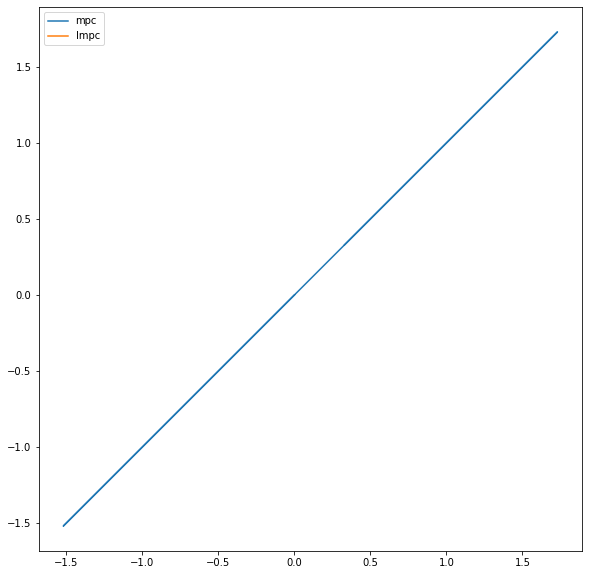

In [8]:
plt.plot(*path[:430, :2].T, label="mpc")
plt.plot(*path[430:, :2].T, label="lmpc")
plt.legend()
plt.gcf().set_size_inches(10, 10)
plt.axis('scaled')

In [9]:
from lmpc_multi_laps import laps

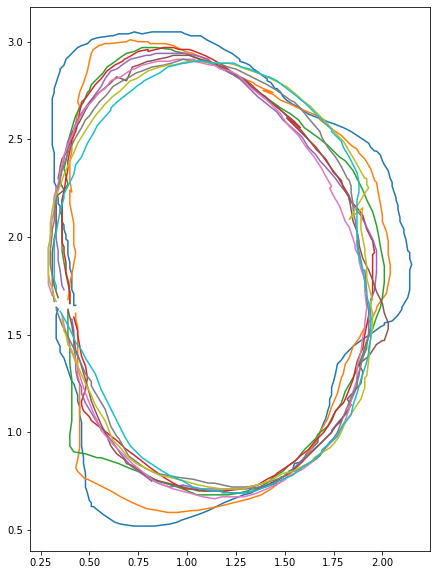

In [10]:
for lap in laps:
    plt.plot(*np.array(lap)[:2])
plt.axis('scaled')
plt.gcf().set_size_inches(10, 10)


In [11]:
with open('../../map_400_fixed.npy', 'rb') as f:
    map_data = np.load(f)

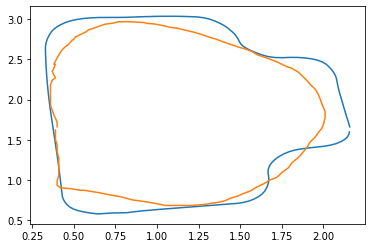

In [12]:
plt.plot(*map_data.T)
plt.plot(*np.array(laps[2])[:2])

In [13]:
def get_border(traj, distance=0.15):
    """
    Get the border of the trajectory.
    
    :param traj: the trajectory of the yellow line
    :param distance: the distance from the center

    :return: the borders of the track
    """
    borders_inside = []
    borders_outside = []
    xm, ym = traj.mean(0)
    for idx, _ in enumerate(traj[:-1]):
        x0, y0 = traj[idx]
        x1, y1 = traj[idx+1]
        m = (y1 - y0) / (x1 - x0)
        xp, yp = (x1 + x0) / 2, (y1 + y0) / 2
        mp = -1 / m
        kp = yp - mp * xp
        a = 1+mp**2
        b = -2*xp+2*mp*(kp-yp)
        c = -distance**2+(kp-yp)**2+xp**2
        try:
            xs0, xs1 = np.roots([a,b,c])
        except np.linalg.LinAlgError:
            print("No solution")
            continue
        ys0, ys1 = mp*xs0+kp, mp*xs1+kp

        if (xs0-xm)**2+(ys0-ym)**2 < (xs1-xm)**2+(ys1-ym)**2:
            borders_inside.append([xs0, ys0])
            borders_outside.append([xs1, ys1])
        else:
            borders_inside.append([xs1, ys1])
            borders_outside.append([xs0, ys0])
    borders_inside = np.array(borders_inside)
    borders_outside = np.array(borders_outside)
    return borders_inside, borders_outside

In [14]:
borders_inside, borders_outside = get_border(map_data, 0.23)

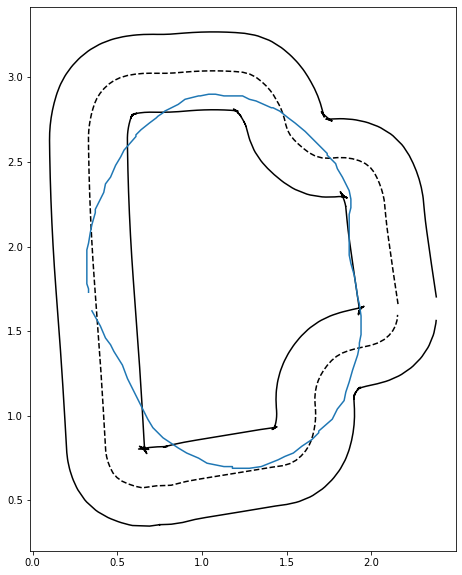

In [15]:
plt.plot(*map_data.T, 'k--')
plt.plot(*borders_inside.T, 'k')
plt.plot(*borders_outside.T, 'k')
plt.plot(*np.array(laps[-1])[:2])
plt.axis('scaled')
plt.gcf().set_size_inches(10, 10)

Text(0.5, 1.0, 'LMPC in Milano Duckar')

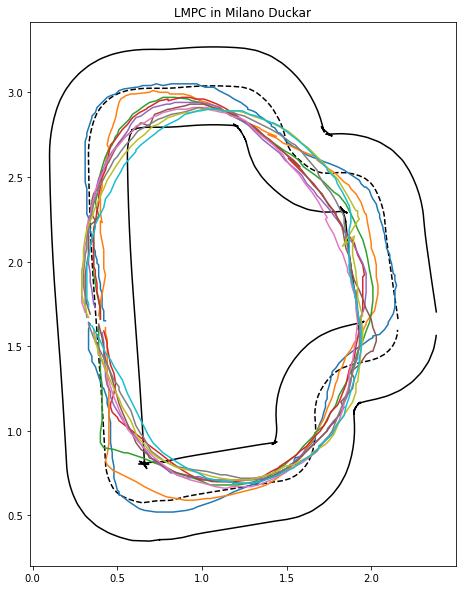

In [16]:
plt.plot(*map_data.T, 'k--')
plt.plot(*borders_inside.T, 'k')
plt.plot(*borders_outside.T, 'k')
for lap in laps:
    plt.plot(*np.array(lap)[:2])
plt.axis('scaled')
plt.gcf().set_size_inches(10, 10)
plt.title("LMPC in Milano Duckar")

Text(0.5, 1.0, 'LMPC in Milano Duckar')

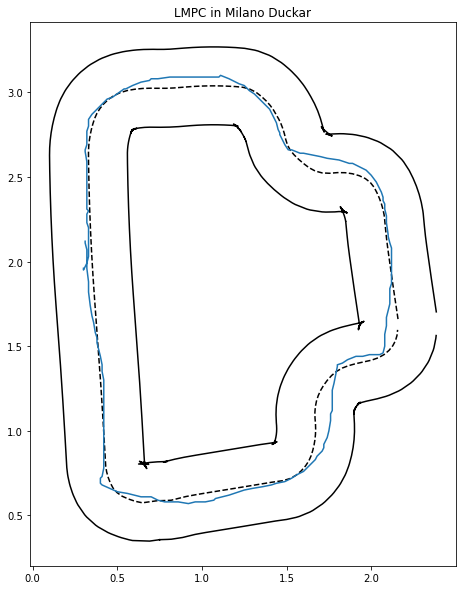

In [22]:
from slack_x1e6_y1e6_noorientation import path
path = np.array(path)

plt.plot(*map_data.T, 'k--')
plt.plot(*borders_inside.T, 'k')
plt.plot(*borders_outside.T, 'k')
plt.plot(*path[:375, :2].T)
plt.axis('scaled')
plt.gcf().set_size_inches(10, 10)
plt.title("LMPC in Milano Duckar")

Text(0.5, 1.0, 'First, middle and last LMPC lap in Milano Duckar')

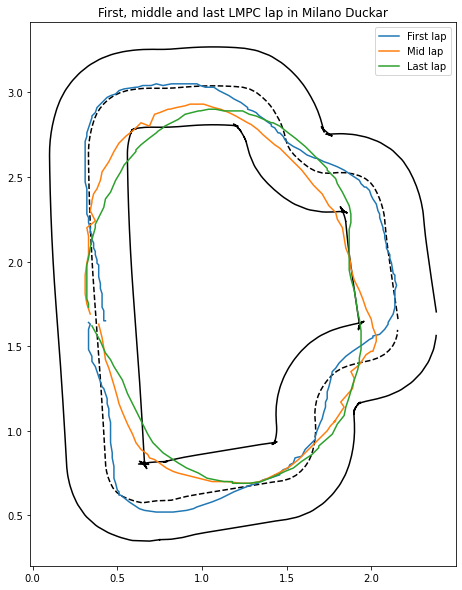

In [74]:
plt.plot(*map_data.T, 'k--')
plt.plot(*borders_inside.T, 'k')
plt.plot(*borders_outside.T, 'k')
plt.plot(*np.array(laps[0])[:2], label="First lap")
plt.plot(*np.array(laps[len(laps)//2])[:2], label="Mid lap")
plt.plot(*np.array(laps[-1])[:2], label="Last lap")
plt.axis('scaled')
plt.gcf().set_size_inches(10, 10)
plt.legend()
plt.title("First, middle and last LMPC lap in Milano Duckar")

Text(0, 0.5, 'Time [s]')

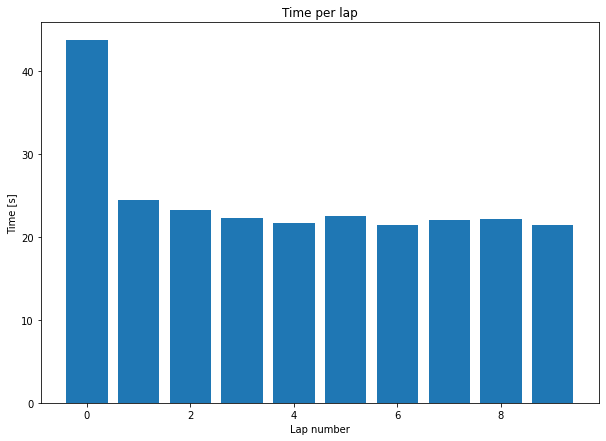

In [75]:
plt.bar(range(len(laps)), [len(lap[0])*0.1 for lap in laps])
plt.title("Time per lap")
plt.gcf().set_size_inches(10, 7)
plt.xlabel("Lap number")
plt.ylabel("Time [s]")

In [76]:
[len(lap[0])*0.1 for lap in laps]

[43.7,
 24.400000000000002,
 23.200000000000003,
 22.3,
 21.700000000000003,
 22.5,
 21.5,
 22.1,
 22.200000000000003,
 21.5]

In [77]:
[len(lap)*0.1 for lap in laps]

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

In [78]:
len(laps[0][0])

437

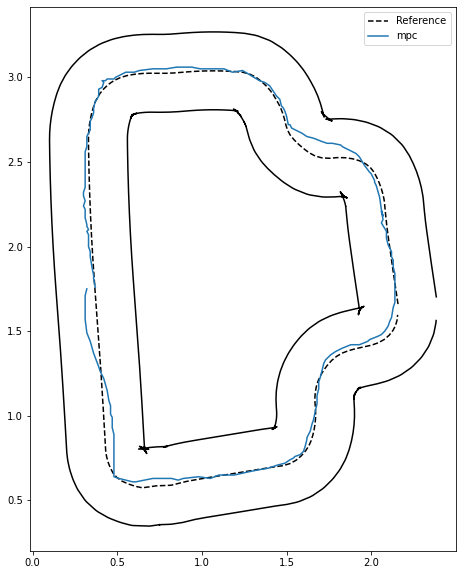

In [79]:
from test_ts_015 import path, reference, chosen_ref

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

plt.plot(*map_data.T, 'k--', label="Reference")
plt.plot(*path[:-length, :2].T, label="mpc")
plt.plot(*borders_inside.T, 'k')
plt.plot(*borders_outside.T, 'k')
plt.axis('scaled')
plt.gcf().set_size_inches(10, 10)
plt.legend()

In [80]:
# interpolate the mpc_path[0]
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d

def interpolate_path(path, distance=0.1):
    """
    Interpolate the path to get a new path with a distance of distance between points.
    """
    x = path[:, 0]
    y = path[:, 1]
    t = np.arange(len(path))
    f = interp1d(t, x)
    g = interp1d(t, y)
    t_new = np.arange(0, len(path), distance)
    x_new = f(t_new)
    y_new = g(t_new)
    return np.array([x_new, y_new]).T

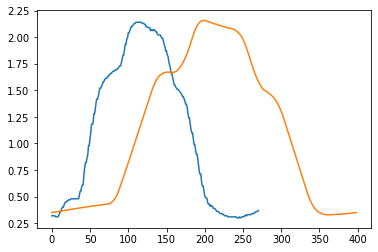

In [81]:
plt.plot(path[:-length, 0], label="MPC")
plt.plot([i for idx, i in enumerate(np.hstack([map_data[200:,0],map_data[:200,0]])) if idx%1 == 0], label="Reference")

In [95]:
ref = []
mpcpath = path[:-length, :2]

for i in range(0, len(mpcpath)):
    idxmin = np.argmin(np.linalg.norm(mpcpath[i] - map_data, axis=1))
    ref.append(map_data[idxmin])

Text(0, 0.5, 'x [m]')

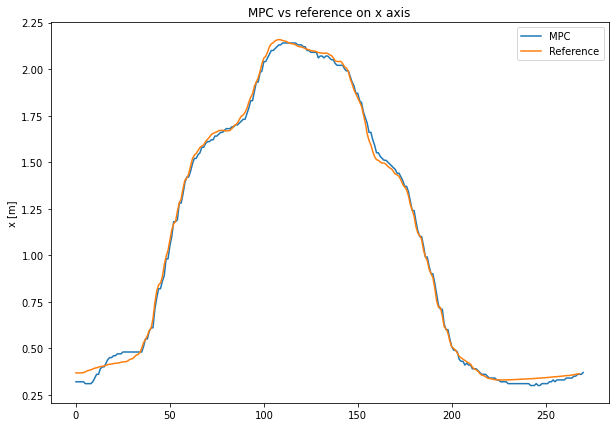

In [96]:
ref = np.array(ref)

# moving average of ref
ref_m = np.array([np.mean(ref[i-1:i+1], axis=0) for i in range(1, len(ref)-1)])

plt.plot(path[:-length, 0], label="MPC")
plt.plot(ref_m[:,0], label="Reference")
plt.legend()
plt.title("MPC vs reference on x axis")
#set dpi
plt.gcf().set_size_inches(10, 7)
plt.ylabel("x [m]")

Text(0, 0.5, 'y [m]')

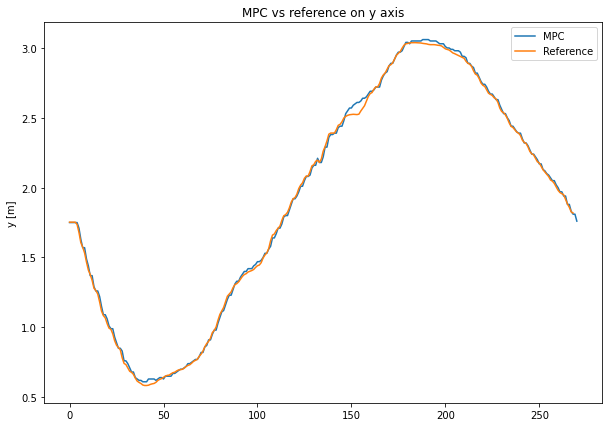

In [97]:
plt.plot(path[:-length, 1], label="MPC")
plt.plot(ref_m[:,1], label="Reference")
plt.legend()
plt.title("MPC vs reference on y axis")
plt.gcf().set_size_inches(10, 7)
plt.ylabel("y [m]")

In [27]:
reference.shape

(656, 5)

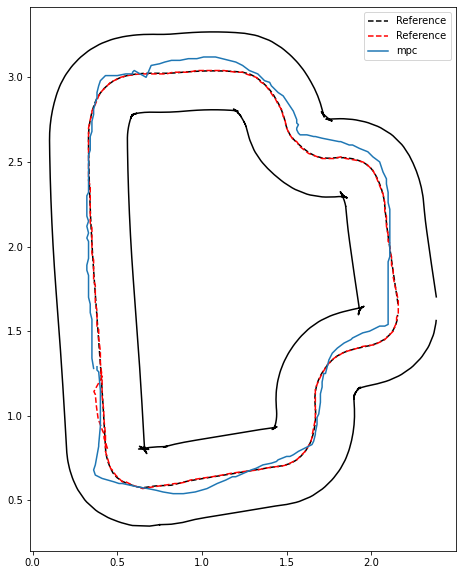

In [28]:
from mpc_references import laps, reference

path = np.array(laps[0])
reference = np.array(reference)
length = reference.shape[0]

plt.plot(*map_data.T, 'k--', label="Reference")
plt.plot(*reference[:, :2, 0].T, 'r--', label="Reference")
plt.plot(*path[:2, :], label="mpc")
plt.plot(*borders_inside.T, 'k')
plt.plot(*borders_outside.T, 'k')
plt.axis('scaled')
plt.gcf().set_size_inches(10, 10)
plt.legend()

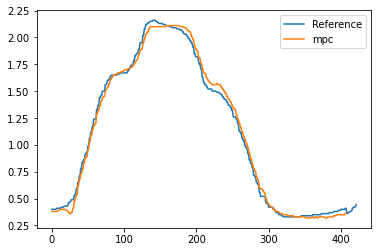

In [29]:
plt.plot(reference[:,0,0], label="Reference")
plt.plot(path[0,:], label="mpc")
plt.legend()

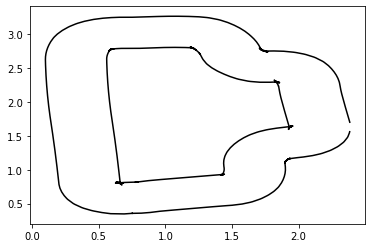

In [30]:
plt.plot(*borders_inside.T, 'k')
plt.plot(*borders_outside.T, 'k')

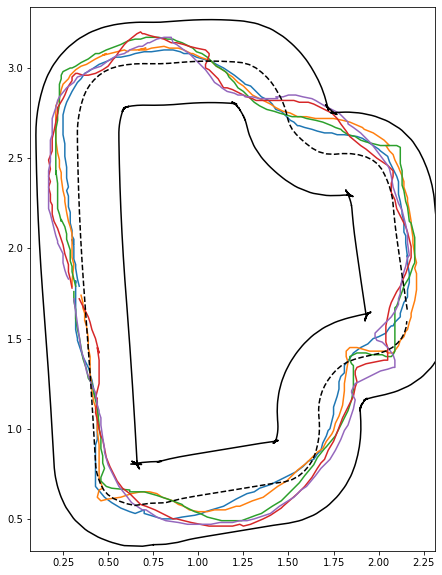

In [31]:
from lmpc_border import laps

for lap in laps:
    plt.plot(*np.array(lap)[:2])
plt.axis('scaled')
plt.gcf().set_size_inches(10, 10)
plt.plot(*borders_inside.T, 'k')
plt.plot(*borders_outside.T, 'k')
plt.plot(*map_data.T, 'k--', label="Reference")

Text(0.5, 1.0, 'Time per lap [s]')

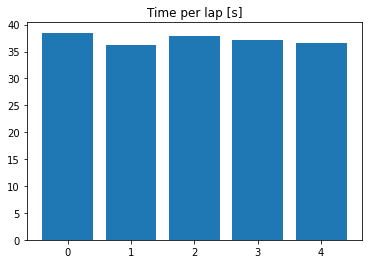

In [32]:
plt.bar(range(len(laps)), [len(lap[0])*0.1 for lap in laps])
plt.title("Time per lap [s]")